<a href="https://colab.research.google.com/github/MatheusRYSE/projeto-An-lise-explorat-ria/blob/main/C%C3%B3pia_de_An%C3%A1lise_do_Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# Imports necessarios

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

# lidar com grandes quantidades de números, lidar com estatísticas, integração numérica,
# solução de equações diferenciais, otimização, integração, álgebra linear, funções especiais,
# polinômios
from scipy import stats

# aplicação prática de machine learning
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.formula.api import ols
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor


# Medidas de avaliação
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix
from sklearn import metrics

# Separação dos arquivos treino, teste
from sklearn.model_selection import train_test_split

# Visualizar todas as colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data
df = pd.read_csv('/content/drive/MyDrive/Fornecedores_rev7.csv')
df.head(5)

,ID,Fornecedor,Item,Qualid_Produto,Preço,Prazo_Entrega_Dias,Historico_Compras,Aval_Cliente_Confiab,Capac_Producao,Sustentabilidade,Bloco_Armazem,Modo_Envio,Custo_Produto,Desconto_Oferecido,Entregue_No_Prazo
0,1,Ali Queen Hair Products,Kit de Barbear Clássico,8.5,7.5,5,120,9.0,Alta,Média,D,Voo,177,44,1
1,2,SARLA,Máquina de Barbear Premium,9.0,8.0,7,320,8.5,Média,Alta,F,Voo,216,59,1
2,3,HJ Hair Products,Conjunto de Barbear Luxuoso,8.0,6.5,6,520,7.0,Alta,Baixa,A,Voo,183,48,1
3,4,Ali Grace Hair,Espuma de Barbear Refrescante,7.0,5.5,10,740,8.0,Média,Alta,B,Voo,176,10,1
4,5,Rosa Beauty,Loção Pós-Barba Revitalizante,8.5,7.0,8,940,8.5,Alta,Média,C,Voo,184,46,1


In [ ]:
df.shape

(200, 15)

In [ ]:
# Colunas em ordem alfabética
sorted(df.columns)

['Aval_Cliente_Confiab',
 'Bloco_Armazem',
 'Capac_Producao',
 'Custo_Produto',
 'Desconto_Oferecido',
 'Entregue_No_Prazo',
 'Fornecedor',
 'Historico_Compras',
 'ID',
 'Item',
 'Modo_Envio',
 'Prazo_Entrega_Dias',
 'Preço',
 'Qualid_Produto',
 'Sustentabilidade']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Fornecedor            200 non-null    object 
 2   Item                  200 non-null    object 
 3   Qualid_Produto        200 non-null    float64
 4   Preço                 200 non-null    float64
 5   Prazo_Entrega_Dias    200 non-null    int64  
 6   Historico_Compras     200 non-null    int64  
 7   Aval_Cliente_Confiab  200 non-null    float64
 8   Capac_Producao        200 non-null    object 
 9   Sustentabilidade      200 non-null    object 
 10  Bloco_Armazem         200 non-null    object 
 11  Modo_Envio            200 non-null    object 
 12  Custo_Produto         200 non-null    int64  
 13  Desconto_Oferecido    200 non-null    int64  
 14  Entregue_No_Prazo     200 non-null    int64  
dtypes: float64(3), int64(6)

In [ ]:
df.isna().sum()

ID                      0
Fornecedor              0
Item                    0
Qualid_Produto          0
Preço                   0
Prazo_Entrega_Dias      0
Historico_Compras       0
Aval_Cliente_Confiab    0
Capac_Producao          0
Sustentabilidade        0
Bloco_Armazem           0
Modo_Envio              0
Custo_Produto           0
Desconto_Oferecido      0
Entregue_No_Prazo       0
dtype: int64

In [ ]:
df.describe()

,ID,Qualid_Produto,Preço,Prazo_Entrega_Dias,Historico_Compras,Aval_Cliente_Confiab,Custo_Produto,Desconto_Oferecido,Entregue_No_Prazo
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.0
mean,100.500000,8.192500,7.185000,6.465000,526.520000,8.197500,189.960000,33.080000,1.0
std,57.879185,0.671901,0.678659,1.247621,265.103696,0.677895,44.772439,18.676393,0.0
min,1.000000,7.000000,5.500000,3.000000,120.000000,7.000000,97.000000,1.000000,1.0
25%,50.750000,7.500000,6.500000,5.000000,320.000000,7.500000,150.750000,17.000000,1.0
50%,100.500000,8.500000,7.500000,6.000000,520.000000,8.500000,183.000000,34.500000,1.0
75%,150.250000,9.000000,8.000000,7.000000,740.000000,9.000000,227.000000,49.000000,1.0
max,200.000000,9.500000,8.500000,10.000000,940.000000,9.500000,286.000000,65.000000,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Fornecedor            200 non-null    object 
 2   Item                  200 non-null    object 
 3   Qualid_Produto        200 non-null    float64
 4   Preço                 200 non-null    float64
 5   Prazo_Entrega_Dias    200 non-null    int64  
 6   Historico_Compras     200 non-null    int64  
 7   Aval_Cliente_Confiab  200 non-null    float64
 8   Capac_Producao        200 non-null    object 
 9   Sustentabilidade      200 non-null    object 
 10  Bloco_Armazem         200 non-null    object 
 11  Modo_Envio            200 non-null    object 
 12  Custo_Produto         200 non-null    int64  
 13  Desconto_Oferecido    200 non-null    int64  
 14  Entregue_No_Prazo     200 non-null    int64  
dtypes: float64(3), int64(6)

In [ ]:
df.head()

,ID,Fornecedor,Item,Qualid_Produto,Preço,Prazo_Entrega_Dias,Historico_Compras,Aval_Cliente_Confiab,Capac_Producao,Sustentabilidade,Bloco_Armazem,Modo_Envio,Custo_Produto,Desconto_Oferecido,Entregue_No_Prazo
0,1,Ali Queen Hair Products,Kit de Barbear Clássico,8.5,7.5,5,120,9.0,Alta,Média,D,Voo,177,44,1
1,2,SARLA,Máquina de Barbear Premium,9.0,8.0,7,320,8.5,Média,Alta,F,Voo,216,59,1
2,3,HJ Hair Products,Conjunto de Barbear Luxuoso,8.0,6.5,6,520,7.0,Alta,Baixa,A,Voo,183,48,1
3,4,Ali Grace Hair,Espuma de Barbear Refrescante,7.0,5.5,10,740,8.0,Média,Alta,B,Voo,176,10,1
4,5,Rosa Beauty,Loção Pós-Barba Revitalizante,8.5,7.0,8,940,8.5,Alta,Média,C,Voo,184,46,1


In [ ]:
# PConverter colunas categóricas para numéricas
# Identificar valores únicos nas colunas 'Fornecedor' e 'Item'
fornecedores_unicos = df['Fornecedor'].unique()
itens_unicos = df['Item'].unique()

# Criar mapeamentos de cada valor único para um número inteiro
fornecedor_mapping = {fornecedor: idx for idx, fornecedor in enumerate(fornecedores_unicos)}
item_mapping = {item: idx for idx, item in enumerate(itens_unicos)}

# Aplicar os mapeamentos para converter as colunas
df['Fornecedor'] = df['Fornecedor'].map(fornecedor_mapping)
df['Item'] = df['Item'].map(item_mapping)

# Mostrar as primeiras linhas do DataFrame para verificar a conversão
print(df.head())


   ID  Fornecedor  Item  Qualid_Produto  Preço  Prazo_Entrega_Dias  \
0   1           0     0             8.5    7.5                   5   
1   2           1     1             9.0    8.0                   7   
2   3           2     2             8.0    6.5                   6   
3   4           3     3             7.0    5.5                  10   
4   5           4     4             8.5    7.0                   8   

   Historico_Compras  Aval_Cliente_Confiab Capac_Producao Sustentabilidade  \
0                120                   9.0           Alta            Média   
1                320                   8.5          Média             Alta   
2                520                   7.0           Alta            Baixa   
3                740                   8.0          Média             Alta   
4                940                   8.5           Alta            Média   

  Bloco_Armazem Modo_Envio  Custo_Produto  Desconto_Oferecido  \
0             D        Voo            177    

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    200 non-null    int64  
 1   Fornecedor            200 non-null    int64  
 2   Item                  200 non-null    int64  
 3   Qualid_Produto        200 non-null    float64
 4   Preço                 200 non-null    float64
 5   Prazo_Entrega_Dias    200 non-null    int64  
 6   Historico_Compras     200 non-null    int64  
 7   Aval_Cliente_Confiab  200 non-null    float64
 8   Capac_Producao        200 non-null    object 
 9   Sustentabilidade      200 non-null    object 
 10  Bloco_Armazem         200 non-null    object 
 11  Modo_Envio            200 non-null    object 
 12  Custo_Produto         200 non-null    int64  
 13  Desconto_Oferecido    200 non-null    int64  
 14  Entregue_No_Prazo     200 non-null    int64  
dtypes: float64(3), int64(8)

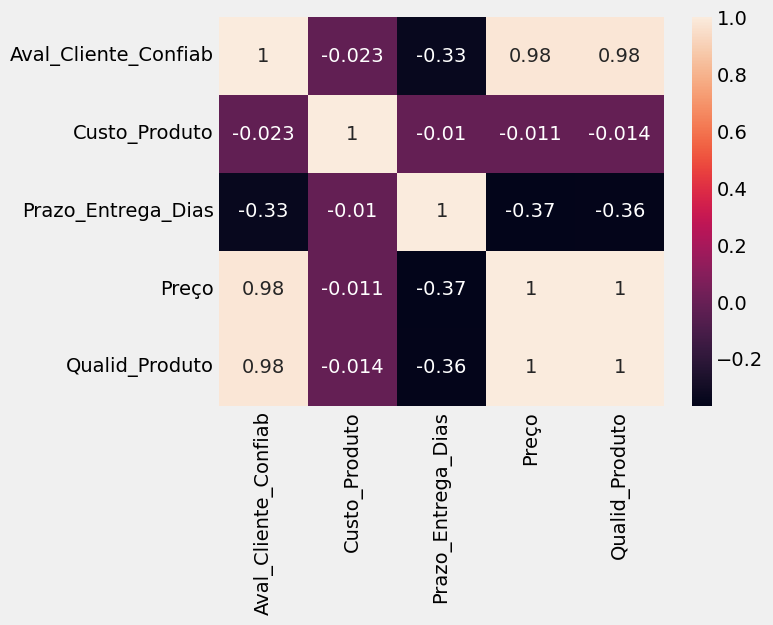

In [ ]:
# Selecionando algumas variáveis e plotando a matriz de correlação
df = df[['Aval_Cliente_Confiab','Custo_Produto','Prazo_Entrega_Dias','Preço','Qualid_Produto']]
ax = sns.heatmap(df.corr(), annot=True)

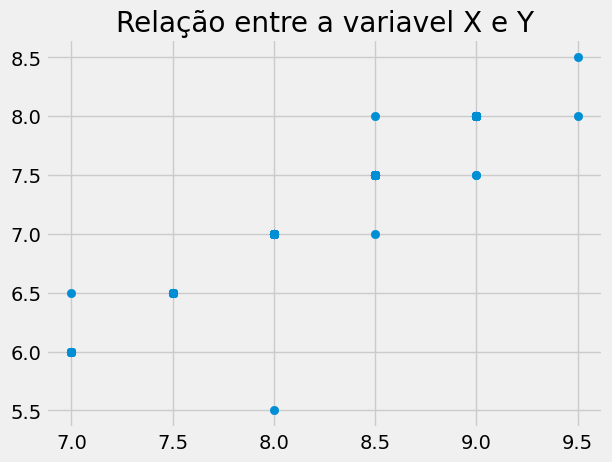

In [ ]:

plt.title('Relação entre a variavel X e Y')
plt.scatter(x=df['Aval_Cliente_Confiab'], y=df['Preço'])
plt.show()

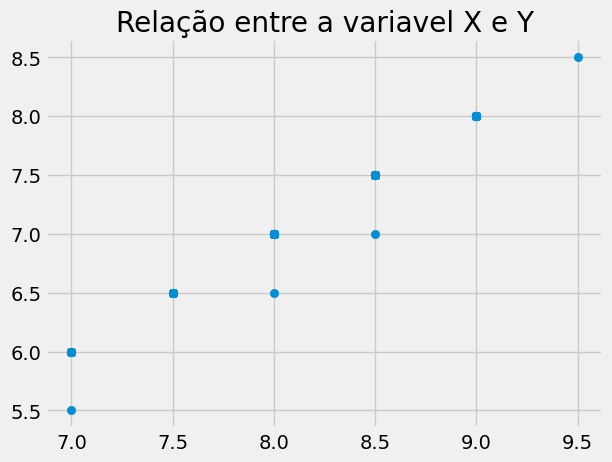

In [ ]:

plt.title('Relação entre a variavel X e Y')
plt.scatter(x=df['Qualid_Produto'], y=df['Preço'])
plt.show()

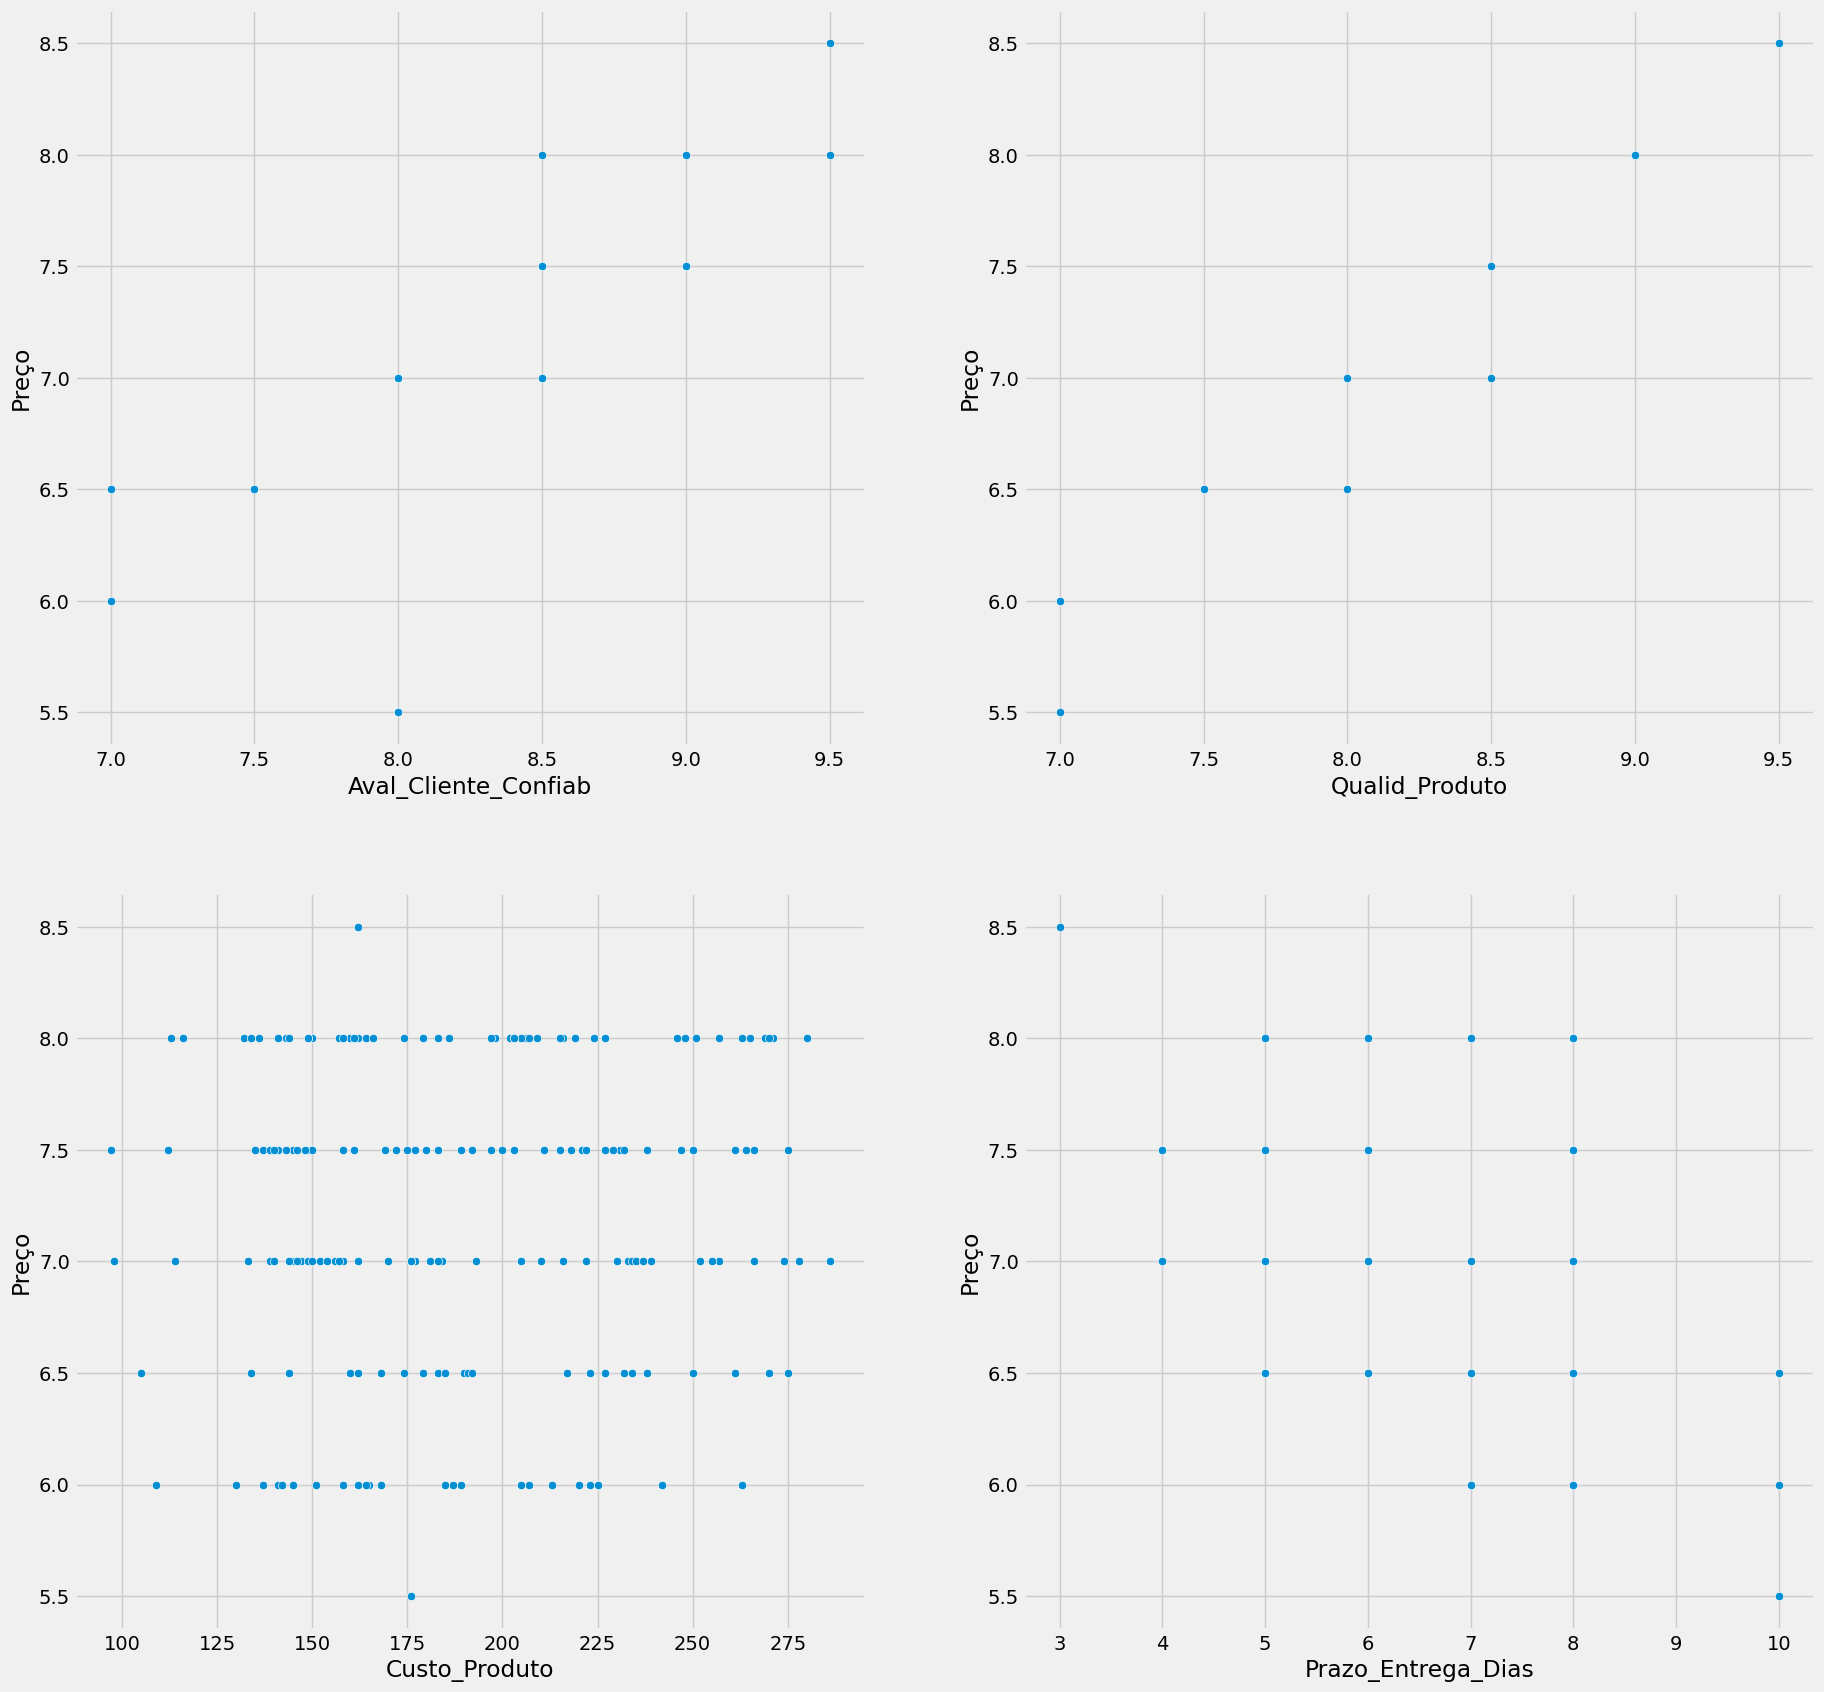

In [ ]:
fig,ax = plt.subplots(2,2, figsize=(20,20))
sns.scatterplot(x='Aval_Cliente_Confiab',y='Preço',data = df,ax=ax[0][0]);
sns.scatterplot(x='Qualid_Produto',y='Preço',data = df,ax=ax[0][1]);
sns.scatterplot(x='Custo_Produto',y='Preço',data = df,ax=ax[1][0]);
sns.scatterplot(x='Prazo_Entrega_Dias',y='Preço',data = df,ax=ax[1][1]);

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aval_Cliente_Confiab  200 non-null    float64
 1   Custo_Produto         200 non-null    int64  
 2   Prazo_Entrega_Dias    200 non-null    int64  
 3   Preço                 200 non-null    float64
 4   Qualid_Produto        200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [ ]:
# Criando x e y
# Cria o dataset. Criamos em formato de array
x = np.array(df[['Aval_Cliente_Confiab','Custo_Produto','Prazo_Entrega_Dias','Qualid_Produto']])
y = np.array(df['Preço'])

In [ ]:
x

array([[  9. , 177. ,   5. ,   8.5],
       [  8.5, 216. ,   7. ,   9. ],
       [  7. , 183. ,   6. ,   8. ],
       [  8. , 176. ,  10. ,   7. ],
       [  8.5, 184. ,   8. ,   8.5],
       [  9.5, 162. ,   3. ,   9.5],
       [  7.5, 250. ,   7. ,   7.5],
       [  8. , 233. ,   6. ,   8. ],
       [  9. , 150. ,   5. ,   8.5],
       [  9.5, 164. ,   8. ,   9. ],
       [  7. , 189. ,  10. ,   7. ],
       [  8.5, 232. ,   4. ,   8.5],
       [  9. , 198. ,   6. ,   9. ],
       [  7.5, 275. ,   7. ,   7.5],
       [  8. , 152. ,   5. ,   8. ],
       [  8.5, 227. ,   6. ,   8.5],
       [  9. , 143. ,   8. ,   9. ],
       [  7.5, 227. ,   5. ,   7.5],
       [  8. , 239. ,   4. ,   8. ],
       [  8.5, 145. ,   6. ,   8.5],
       [  9. , 161. ,   7. ,   9. ],
       [  7.5, 232. ,  10. ,   7.5],
       [  8. , 156. ,   5. ,   8. ],
       [  8.5, 211. ,   4. ,   8.5],
       [  9. , 251. ,   6. ,   9. ],
       [  7. , 225. ,   7. ,   7. ],
       [  8.5, 172. ,   8. ,   8.5],
 

In [ ]:
y

array([7.5, 8. , 6.5, 5.5, 7. , 8.5, 6.5, 7. , 7.5, 8. , 6. , 7.5, 8. ,
       6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. ,
       7.5, 8. , 6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5,
       8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. ,
       6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 7.5, 8. , 6.5, 7. , 7.5,
       8. , 6. , 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. ,
       6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5,
       7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 6. , 7.5, 8. , 6. , 7. ,
       7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5,
       8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. ,
       6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6. ,
       7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. ,
       7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5,
       8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.

In [ ]:
# Cria o modelo de regressão linear e aplica o modelo (fit)
modelo = LinearRegression()
modelo.fit(x,y)

# ... ou assim em uma linha
# modelo = LinearRegression().fit(x,y)
# modelo

LinearRegression()

In [ ]:
# Avalia o modelo
print('coeficiente de determinação:', round(modelo.score(x, y),4))

# Intercept
print('intercept:', round(modelo.intercept_,6))

# Slope
print('slope:', modelo.coef_)

coeficiente de determinação: 0.9921
intercept: -0.977497
slope: [ 1.08441694e-02  3.34701001e-05 -7.27808582e-03  9.90454263e-01]


In [ ]:
# Outra forma - regressão linear múltipla
# Olhar a significância dos parâmetros

ols_modelo = ols("y ~ x", data=df)
modelo = ols_modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     6151.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          6.52e-204
Time:                        00:50:32   Log-Likelihood:                 278.79
No. Observations:                 200   AIC:                            -547.6
Df Residuals:                     195   BIC:                            -531.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9775      0.071    -13.690      0.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aval_Cliente_Confiab  200 non-null    float64
 1   Custo_Produto         200 non-null    int64  
 2   Prazo_Entrega_Dias    200 non-null    int64  
 3   Preço                 200 non-null    float64
 4   Qualid_Produto        200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [ ]:
# Criando x e y
# Cria o dataset. Criamos em formato de array
x = np.array(df[['Qualid_Produto','Prazo_Entrega_Dias','Aval_Cliente_Confiab']])
y = np.array(df['Preço'])

In [ ]:
x

array([[ 8.5,  5. ,  9. ],
       [ 9. ,  7. ,  8.5],
       [ 8. ,  6. ,  7. ],
       [ 7. , 10. ,  8. ],
       [ 8.5,  8. ,  8.5],
       [ 9.5,  3. ,  9.5],
       [ 7.5,  7. ,  7.5],
       [ 8. ,  6. ,  8. ],
       [ 8.5,  5. ,  9. ],
       [ 9. ,  8. ,  9.5],
       [ 7. , 10. ,  7. ],
       [ 8.5,  4. ,  8.5],
       [ 9. ,  6. ,  9. ],
       [ 7.5,  7. ,  7.5],
       [ 8. ,  5. ,  8. ],
       [ 8.5,  6. ,  8.5],
       [ 9. ,  8. ,  9. ],
       [ 7.5,  5. ,  7.5],
       [ 8. ,  4. ,  8. ],
       [ 8.5,  6. ,  8.5],
       [ 9. ,  7. ,  9. ],
       [ 7.5, 10. ,  7.5],
       [ 8. ,  5. ,  8. ],
       [ 8.5,  4. ,  8.5],
       [ 9. ,  6. ,  9. ],
       [ 7. ,  7. ,  7. ],
       [ 8.5,  8. ,  8.5],
       [ 9. ,  5. ,  9. ],
       [ 7.5,  6. ,  7.5],
       [ 8. ,  7. ,  8. ],
       [ 8.5,  6. ,  8.5],
       [ 9. ,  5. ,  9. ],
       [ 7.5,  7. ,  7.5],
       [ 8. ,  8. ,  8. ],
       [ 8.5,  5. ,  8.5],
       [ 9. ,  6. ,  9. ],
       [ 7. ,  7. ,  7. ],
 

In [ ]:
y

array([7.5, 8. , 6.5, 5.5, 7. , 8.5, 6.5, 7. , 7.5, 8. , 6. , 7.5, 8. ,
       6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. ,
       7.5, 8. , 6.5, 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5,
       8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. ,
       6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 7.5, 8. , 6.5, 7. , 7.5,
       8. , 6. , 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. ,
       6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5,
       7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 6. , 7.5, 8. , 6. , 7. ,
       7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5,
       8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. ,
       6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6. ,
       7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. ,
       7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5,
       8. , 6.5, 7. , 7.5, 8. , 6. , 7. , 7.5, 8. , 6.5, 7. , 7.

In [ ]:
# Cria o modelo de regressão linear e aplica o modelo (fit)
modelo = LinearRegression()
modelo.fit(x,y)

# ... ou assim em uma linha
# modelo = LinearRegression().fit(x,y)
# modelo

LinearRegression()

In [ ]:
# Avalia o modelo
print('coeficiente de determinação:', round(modelo.score(x, y),4))

# Intercept
print('intercept:', round(modelo.intercept_,6))

# Slope
print('slope:', modelo.coef_)

coeficiente de determinação: 0.9921
intercept: -0.970671
slope: [ 0.99106923 -0.00729273  0.01018409]


In [ ]:
# Outra forma - regressão linear múltipla
# Olhar a significância dos parâmetros

ols_modelo = ols("y ~ x", data=df)
modelo = ols_modelo.fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                     8238.
Date:                Sat, 01 Jun 2024   Prob (F-statistic):          7.02e-206
Time:                        00:50:58   Log-Likelihood:                 278.73
No. Observations:                 200   AIC:                            -549.5
Df Residuals:                     196   BIC:                            -536.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.9707      0.068    -14.173      0.0

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aval_Cliente_Confiab  200 non-null    float64
 1   Custo_Produto         200 non-null    int64  
 2   Prazo_Entrega_Dias    200 non-null    int64  
 3   Preço                 200 non-null    float64
 4   Qualid_Produto        200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


In [ ]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE = metrics.mean_absolute_error(y_test, y_pred)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE = metrics.mean_squared_error(y_test, y_pred)
print('MSE:', metrics.mean_squared_error(y_test, y_pred))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

# R2: calcula qual a porcentagem da variância que pode ser explicada pelo modelo de regressão.
# Informa o quão “próximo” as medidas reais estão do nosso modelo. Pode variar entre 0 e 1
R2_SCORE = metrics.r2_score(y_test, y_pred)
print('R2_SCORE:', metrics.r2_score(y_test, y_pred))

MAE: 0.012480425167815844
MSE: 0.0002242865528808242
RMSE: 0.014976199547309197
R2_SCORE: 0.9995135771133726


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Treinar o modelo
model.fit(x_train, y_train)

# Fazer previsões
y_pred = model.predict(x_test)


In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2}')

# Exibir os coeficientes do modelo
print('Coeficientes:', model.coef_)
print('Intercepto:', model.intercept_)

Mean Squared Error: 0.0002242865528808242
R^2 Score: 0.9995135771133726
Coeficientes: [ 0.99151272 -0.00897664  0.00963239]
Intercepto: -0.961105851463639


MODELO DE APLICAÇÃO DO MACHINE LEARNING
TREINO E TESTE COM XGBOOST

In [ ]:
# Criando o objeto da regressão XGBOOST
xgb_regressor = XGBRegressor(random_state=42)

# Modelo
xgb_regressor.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Utilizando o modelo nos dados de teste
xgb_result = xgb_regressor.predict(x_test)
xgb_result[10]

5.999929

In [ ]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_xgb = metrics.mean_absolute_error(y_test, xgb_result)
print('MAE_xgb:', metrics.mean_absolute_error(y_test, xgb_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_xgb = metrics.mean_squared_error(y_test, xgb_result)
print('MSE_xgb:', metrics.mean_squared_error(y_test, xgb_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_xgb = np.sqrt(metrics.mean_squared_error(y_test, xgb_result))
print('RMSE_xgb:', np.sqrt(metrics.mean_squared_error(y_test, xgb_result)))

MAE_xgb: 6.744861602783203e-05
MSE_xgb: 8.68233200890245e-09
RMSE_xgb: 9.317903202385421e-05


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Aval_Cliente_Confiab  200 non-null    float64
 1   Custo_Produto         200 non-null    int64  
 2   Prazo_Entrega_Dias    200 non-null    int64  
 3   Preço                 200 non-null    float64
 4   Qualid_Produto        200 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 7.9 KB


# Random Forest

In [ ]:
# Criando o objeto da regressão Random Forest
rf_regressor = RandomForestRegressor(random_state=42)

# Modelo
rf_regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Utilizando o modelo nos dados de teste
rf_result = rf_regressor.predict(x_test)
rf_result[10]

6.0

In [ ]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_rf = metrics.mean_absolute_error(y_test, rf_result)
print('MAE_rf:', metrics.mean_absolute_error(y_test, rf_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_rf = metrics.mean_squared_error(y_test, rf_result)
print('MSE_rf:', metrics.mean_squared_error(y_test, rf_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_rf = np.sqrt(metrics.mean_squared_error(y_test, rf_result))
print('RMSE_rf:', np.sqrt(metrics.mean_squared_error(y_test, rf_result)))


MAE_rf: 0.0035000000000000144
MSE_rf: 0.000490000000000004
RMSE_rf: 0.022135943621178746


# AdaBoosting

In [ ]:
# Criando o objeto da regressão AdaBoost
ada_regressor = AdaBoostRegressor(random_state=42)

# Modelo
ada_regressor.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [ ]:
# Utilizando o modelo nos dados de teste
ada_result = ada_regressor.predict(x_test)
ada_result[10]

6.0

In [ ]:
# Métricas de avaliação

# Erro Absoluto Médio (MAE): mede as distâncias entre valores preditos e observados.
# Essa métrica não é muito influenciada pelos outliers. Quanto menor seu valor, melhor
MAE_ada = metrics.mean_absolute_error(y_test, ada_result)
print('MAE_ada:', metrics.mean_absolute_error(y_test, ada_result))

# Erro Quadrático Médio (MSE): indicada para problemas nos quais grandes erros não são tolerados.
# Mais difícil de interpretar, pois eleva a unidade ao quadrado. Quanto menor seu valor, melhor
MSE_ada = metrics.mean_squared_error(y_test, ada_result)
print('MSE_ada:', metrics.mean_squared_error(y_test, ada_result))

# Raiz do Erro Quadrático Médio (RMSE): tem a mesma unidade dos valores observados e preditos.
# Seu resultado é uma medida do desvio médio (erro) entre observado e predito
RMSE_ada = np.sqrt(metrics.mean_squared_error(y_test, ada_result))
print('RMSE_ada:', np.sqrt(metrics.mean_squared_error(y_test, ada_result)))

MAE_ada: 0.06893939393939388
MSE_ada: 0.014623507805325961
RMSE_ada: 0.12092769660142362
